# sorting algos
_implementation of different sorting algorithms_

- insertion sort
- bubble sort
- selection sort
- quick sort
- merge sort
- heap sort

In [1]:
import numba as nb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# define plt size
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
def new_X():
    """create new random X to be sorted and plot it"""
    global X
    X = np.random.randint(100, size=50)

    sns.barplot(X) 

## insertion sort

<AxesSubplot:>

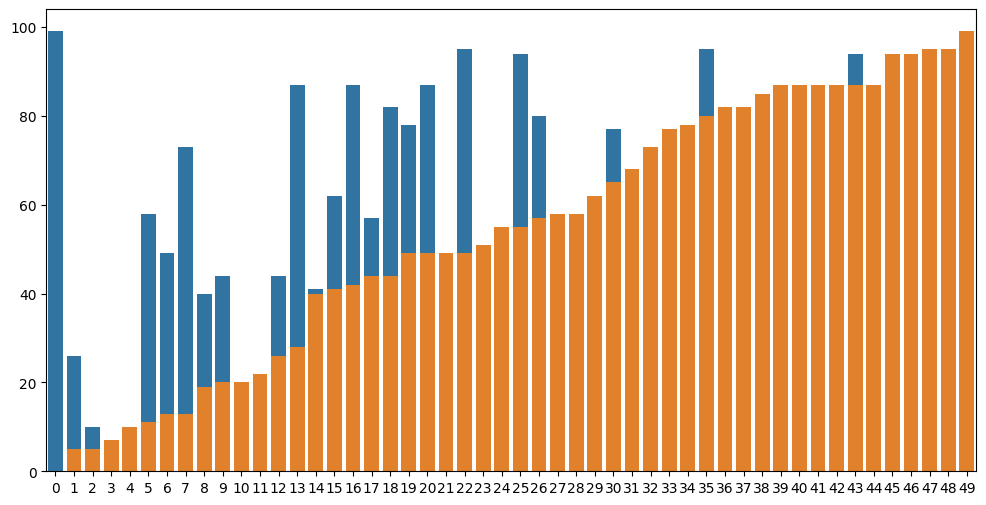

In [4]:
new_X()

def insertion_sort(X):
    """
    Sorts the array `X` in ascending order using the Insertion Sort algorithm.
    """
    n = len(X)
    # Move through each element in the array starting from the second element
    for j in range(1, n):
        key = X[j]  # The element to be inserted
        i = j - 1   # Start comparing with the previous element

        # Shift elements in the sorted section right until the correct position for key is found
        while i >= 0 and X[i] > key:
            X[i + 1] = X[i]
            i -= 1

        # Insert the key in the correct position within the sorted section
        X[i + 1] = key

insertion_sort(X)
sns.barplot(X)

## bubble sort

<AxesSubplot:>

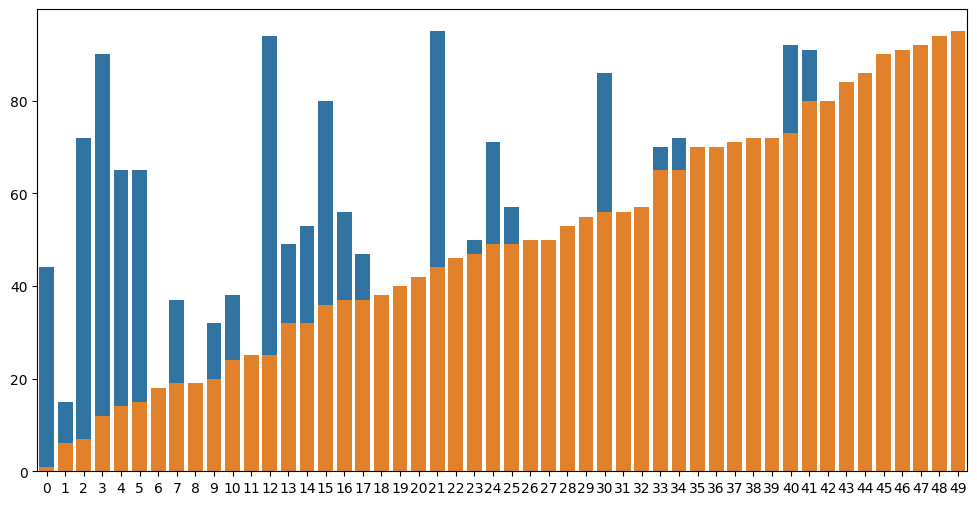

In [5]:
new_X()

def bubble_sort(X):
    """
    Sorts the array `X` in ascending order using the Bubble Sort algorithm.
    """
    n = len(X)
    # Move through the array up to n times
    for i in range(n):
        # Compare and bubble the largest unsorted element to the end of the list
        for j in range(n - 2, i - 1, -1):  # Traverse from end back to i
            if X[j] > X[j + 1]:  # If the current element is larger than the next
                X[j], X[j + 1] = X[j + 1], X[j]  # Swap the two elements


bubble_sort(X)
sns.barplot(X)

## selection sort

<AxesSubplot:>

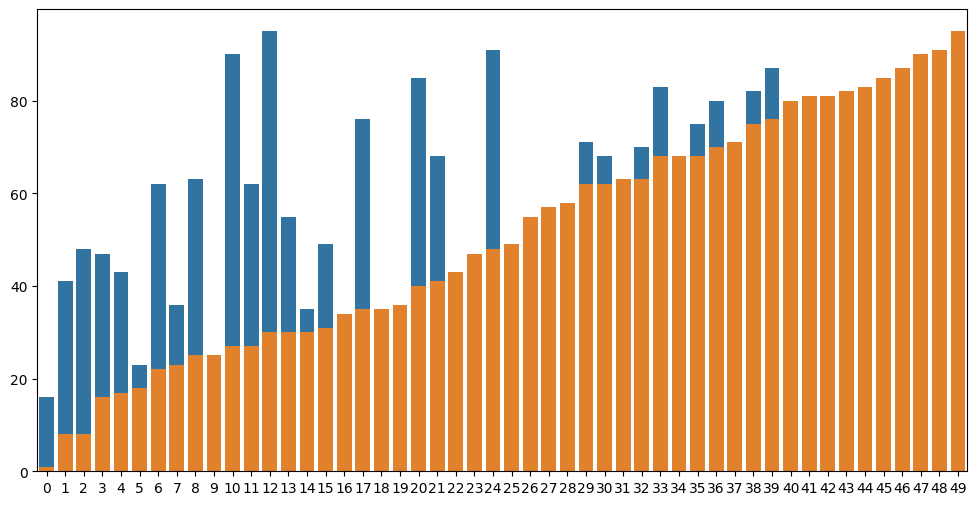

In [6]:
new_X()

def selection_sort(X):
    """
    Sorts the array `X` in ascending order using the Selection Sort algorithm.
    """
    n = len(X)
    # Move through the array one element at a time
    for i in range(n):
        min_index = i  # Assume the current position holds the minimum element

        # Look for the minimum element in the remaining unsorted section
        for j in range(i, n):
            if X[j] < X[min_index]:
                min_index = j  # Update min_index if a smaller element is found

        # Swap the found minimum element with the first unsorted element
        X[i], X[min_index] = X[min_index], X[i]

selection_sort(X)
sns.barplot(X)

## merge sort

<AxesSubplot:>

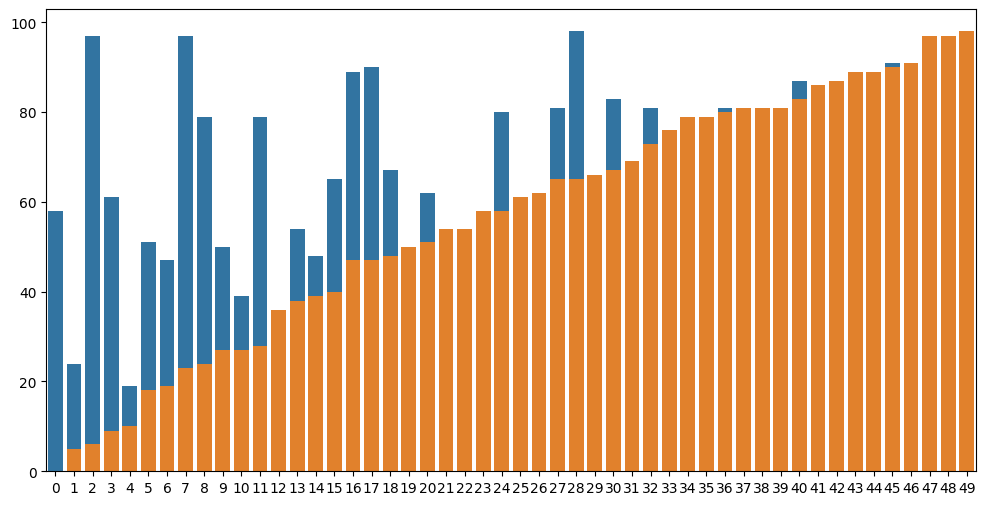

In [7]:
new_X()

def merge(X, left, right, mid):
    """
    Merges two sorted subarrays of X.
    The subarrays are X[left:mid + 1] and X[mid + 1:right + 1].
    """
    n = right - left + 1  # Total number of elements to merge
    a1f = left  # Start index of the first subarray
    a1l = mid  # End index of the first subarray
    a2f = mid + 1  # Start index of the second subarray
    a2l = right  # End index of the second subarray

    # Create a temporary array to store merged elements
    anew = [0] * n  

    # Merge the two subarrays
    for i in range(n):
        # Check if there are elements left in the first subarray
        if a1f <= a1l:
            # Check if there are elements left in the second subarray
            if a2f <= a2l:
                # Choose the smaller element from both subarrays
                if X[a1f] <= X[a2f]:
                    anew[i] = X[a1f]  # Take element from the first subarray
                    a1f += 1  # Move the pointer in the first subarray
                else:
                    anew[i] = X[a2f]  # Take element from the second subarray
                    a2f += 1  # Move the pointer in the second subarray
            else:
                # If the second subarray is exhausted, take from the first
                anew[i] = X[a1f]
                a1f += 1
        else:
            # If the first subarray is exhausted, take from the second
            anew[i] = X[a2f]
            a2f += 1

    # Copy the merged elements back into the original array
    for i in range(n):
        X[left + i] = anew[i]


def merge_sort(X, left, right):
    """
    Sorts the array X using the Merge Sort algorithm.
    Recursively divides the array into halves and merges them.
    """
    if left < right:
        # Find the midpoint of the array
        mid = (left + right) // 2  
        
        # Recursively sort the first half
        merge_sort(X, left, mid)  
        
        # Recursively sort the second half
        merge_sort(X, mid + 1, right)  
        
        # Merge the sorted halves
        merge(X, left, right, mid)  


merge_sort(X, 0, len(X) - 1)
sns.barplot(X)

## quicksort

<AxesSubplot:>

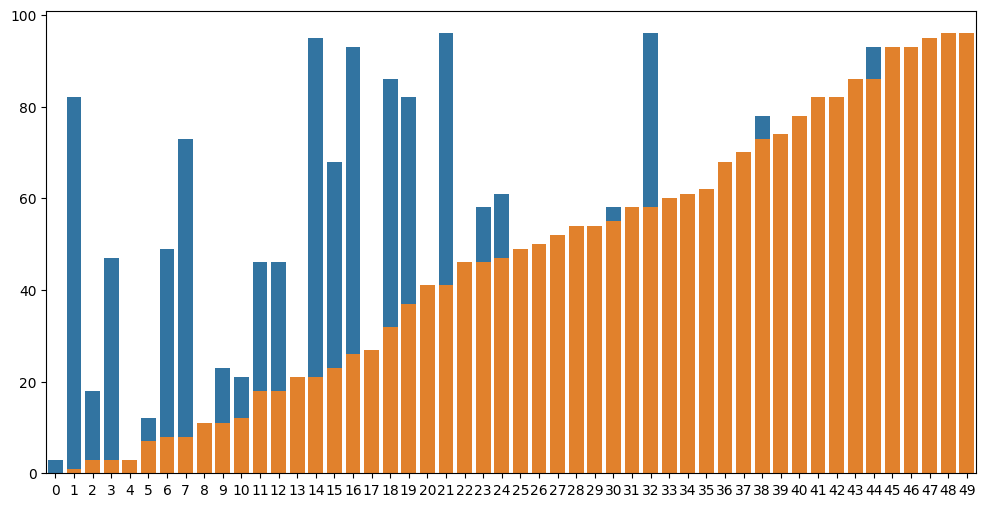

In [8]:
new_X()

def quicksort(X, start, end):
    """
    Recursively applies quicksort on the array `X` between indices `start` and `end`.
    """
    if start < end:
        # Partition the array and get the pivot index where partitioning occurs
        pivot_index = prepare_partition(X, start, end)
        # Recursively apply quicksort on the left and right of the pivot
        quicksort(X, start, pivot_index - 1)
        quicksort(X, pivot_index + 1, end)

def prepare_partition(X, start, end):
    """
    Partitions the array `X` from `start` to `end`, using the element at `start` as the pivot.
    Elements less than or equal to the pivot are moved to the left, and others to the right.
    Returns the final position of the pivot element.
    """
    pivot = X[start]  # Choose the pivot as the first element in the current section
    pivot_position = start - 1  # Index to place elements less than the pivot

    # Move elements smaller than or equal to pivot to the left
    for i in range(start, end + 1):
        if X[i] <= pivot:
            pivot_position += 1
            # Swap current element with the element at pivot_position
            X[i], X[pivot_position] = X[pivot_position], X[i]

    # Place the pivot in its final sorted position
    X[start], X[pivot_position] = X[pivot_position], X[start]
    return pivot_position  # Return the index of the pivot

quicksort(X, 0, len(X) - 1)
sns.barplot(X)

## heap sort

<AxesSubplot:>

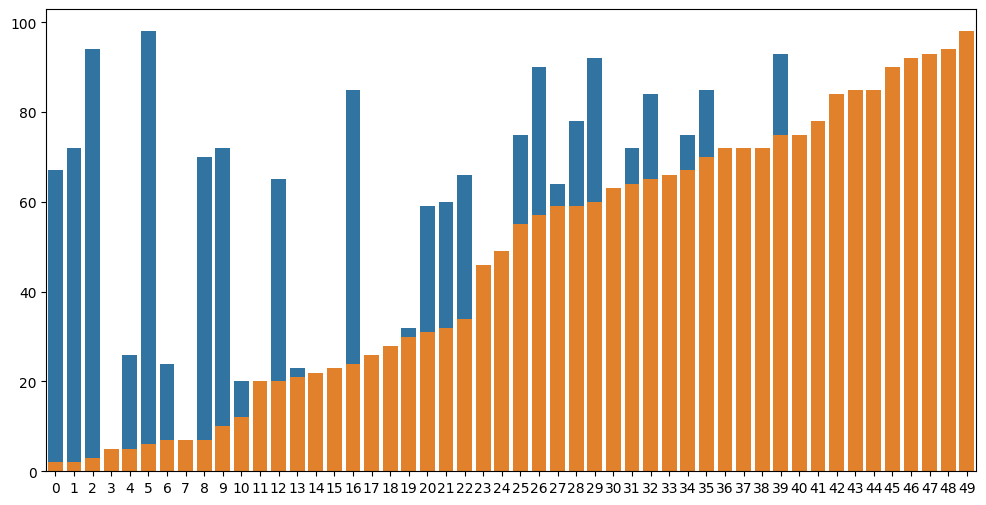

In [9]:
new_X()

def heapify(X, start, end, root):
    """
    Ensures the heap property for a subtree rooted at 'root'.
    It assumes that the left and right subtrees are already heapified.
    """
    largest = root  # Initialize largest as root
    left = 2 * root + 1  # Left child index
    right = 2 * root + 2  # Right child index

    # Check if the left child exists and is greater than the root
    if left <= end and X[left] > X[largest]:
        largest = left
    
    # Check if the right child exists and is greater than the largest found so far
    if right <= end and X[right] > X[largest]:
        largest = right

    # If the largest is not root, swap and continue heapifying the affected subtree
    if largest != root:
        X[root], X[largest] = X[largest], X[root]  # Swap root with largest
        heapify(X, start, end, largest)  # Recursively heapify the affected subtree


def build_heap(X, start, end):
    """
    Builds a max heap from the array X.
    Starts heapifying from the last non-leaf node down to the root.
    """
    n = end - start + 1  # Total number of elements in the heap
    # Start from the last non-leaf node and heapify each node
    for i in range((n - 2) // 2, start - 1, -1):
        heapify(X, start, end, i)


def heap_sort(X, start, end):
    """
    Sorts the array X using the Heap Sort algorithm.
    First builds a heap and then sorts the array.
    """
    build_heap(X, start, end)  # Build a max heap
    # Extract elements from the heap one by one
    for i in range(end, start, -1):
        X[start], X[i] = X[i], X[start]  # Swap the current root with the end
        heapify(X, start, i - 1, start)  # Heapify the reduced heap

heap_sort(X, 0, len(X) - 1)
sns.barplot(X)

## count sort

IndexError: list index out of range

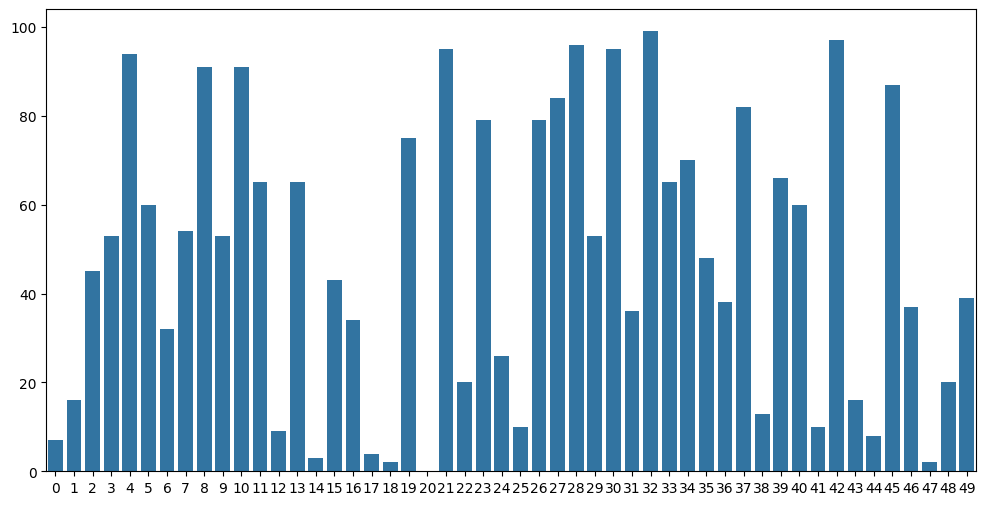

In [12]:
new_X()

def count_sort(X, n, k):
    """
    Performs counting sort on the array X.
    
    Parameters:
    - X: list of integers to be sorted
    - n: number of elements in X
    - k: maximum value in X (range of the input values)
    """
    # Initialize the counting array (bin) to store the frequency of each number
    bin = [0] * (k + 1)  # Create a list with k+1 elements initialized to 0
    
    # Count the occurrences of each element in X
    for i in range(n):
        bin[X[i]] += 1  # Increment the count for the current element

    j = 1  # Initialize index for the next non-zero value
    # Build the sorted array using the counting array
    for i in range(n):
        # Find the next value with a count greater than 0
        while bin[j] == 0:
            j += 1  # Move to the next index if the count is 0
        
        X[i] = j  # Place the next non-zero value in the sorted array
        bin[j] -= 1  # Decrease the count of that value by 1

# Example usage:
# X = [4, 2, 2, 8, 3, 3, 1]
# count_sort(X, len(X), max(X))
# print(X)  # Output will be the sorted array

count_sort(X, len(X), max(X))
sns.barplot(X)

## map sort

<AxesSubplot:>

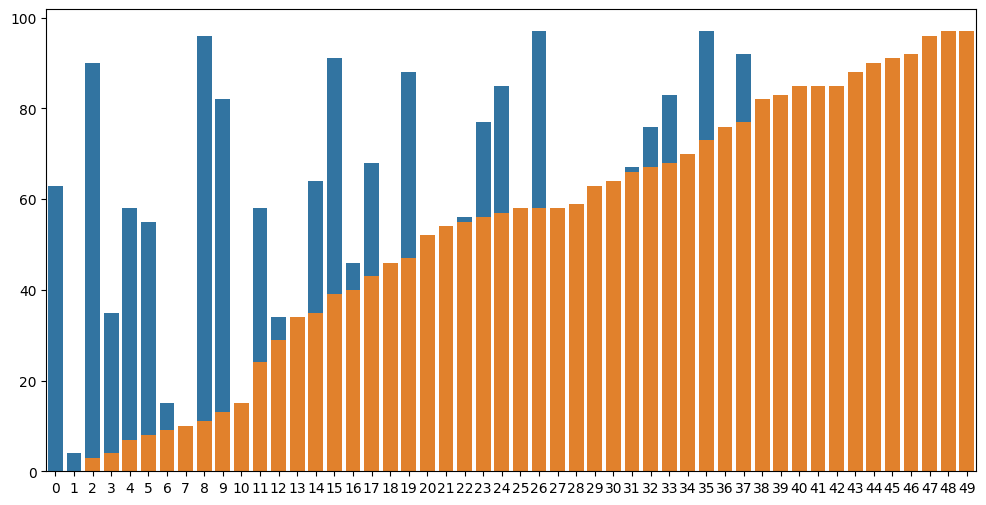

In [11]:
new_X()

def map_sort(X, n, c):
    """
    Performs Map Sort on the array X.
    
    Parameters:
    - X: list of integers to be sorted
    - n: number of elements in X
    - c: scaling factor to determine the size of the bin array
    """
    # Calculate the new size for the bin array based on the scaling factor c
    newn = int(n * c)
    bin = [-1] * newn  # Initialize the bin array with -1 to indicate empty slots

    # Initialize variables to find the minimum and maximum values in X
    max_value = float('-inf')  # Initialize to minimum integer value
    min_value = float('inf')    # Initialize to maximum integer value

    # Find the minimum and maximum values in the original array X
    for i in range(n):
        if X[i] < min_value:
            min_value = X[i]
        if X[i] > max_value:
            max_value = X[i]

    # Calculate the distance between the minimum and maximum values
    dist = (max_value - min_value) / (newn - 1)

    # Map the elements of X into the bin array
    for i in range(n):
        # Calculate the index for the bin array
        t = int((X[i] - min_value) / dist)
        insert = X[i]
        left = 0  # Direction indicator for searching in the bin

        # If the bin slot is occupied and the current element is less than or equal to that bin
        if bin[t] != -1 and insert <= bin[t]:
            left = 1

        # Handle insertion in the appropriate bin slot
        while bin[t] != -1:
            if left == 1:
                # Move left in the bin
                if insert > bin[t]:
                    bin[t], insert = insert, bin[t]  # Swap values
                if t > 0:
                    t -= 1  # Move left in the bin array
                else:
                    left = 0  # Switch to right search
            else:
                # Move right in the bin
                if insert <= bin[t]:
                    bin[t], insert = insert, bin[t]  # Swap values
                if t < newn - 1:
                    t += 1  # Move right in the bin array
                else:
                    left = 1  # Switch to left search

        # Place the element in the appropriate bin
        bin[t] = insert

    # Copy the sorted elements back to the original array
    j = 0
    for i in range(newn):
        if bin[i] != -1:
            X[j] = bin[i]
            j += 1

# Example usage:
# X = [4, 2, 2, 8, 3, 3, 1]
# map_sort(X, len(X), 1.0)  # Use 1.0 as the scaling factor
# print(X)  # Output will be the sorted array

map_sort(X, len(X), 1.)
sns.barplot(X)